In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [44]:
df = pd.read_excel("Results.xlsx", header=None)
df = df.loc[1:,list(range(11))].set_index(0).T
df.head()

,demog1,demog2,demog3,demog4,demog5,demog6,demog7,demog8,manual_needle1,manual_needle2,...,forceps2,forceps3,forceps_feedback1,forceps_feedback2,forceps_feedback3,forceps_feedback4.1,forceps_feedback4.2,forceps_feedback4.3,changing _instrument,forceps_xbox
1,M,23,Y,Y,2,N,N,N,4,3,...,1,3,2,1,4,5,5,5,2,4
2,M,23,Y,Y,4,Y,N,N,4,3,...,4,3,3,2,3,3,5,5,1,4
3,M,31,Y,Y,1,N,N,N,2,3,...,1,2,1,1,5,5,5,5,1,5
4,M,36,Y,Y,4,N,N,N,3,4,...,2,2,2,3,3,4,4,4,3,2
5,M,27,Y,N,4,N,N,N,3,4,...,1,2,2,1,5,5,5,5,1,5


In [51]:
def plot_question(variable, title):
    by_change = df.groupby(variable)[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
    categories = ["Very Easy", "Easy", "Ok", "Hard", "Very Hard"]
    value_map = {i: v for i, v in enumerate(categories, 1)}
    by_change["category"] = by_change[variable].map(value_map)
    by_change["category"] = pd.Categorical(by_change["category"], categories)
    
    plt.bar(by_change["category"], by_change["count"])
    plt.yticks(range(9))
    plt.xticks(categories)
    plt.ylabel("N. Participants")
    plt.title(title)
    plt.show()

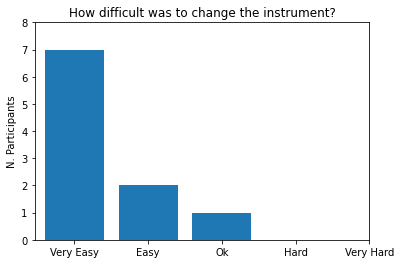

In [52]:
plot_question(variable = "changing _instrument", title = "How difficult was to change the instrument?")

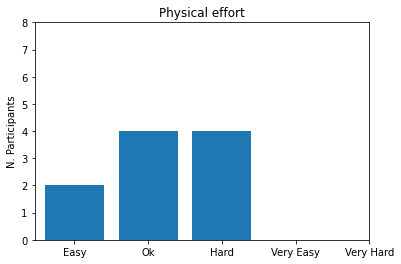

In [53]:
plot_question(variable = "manual_needle1", title = "Physical effort")

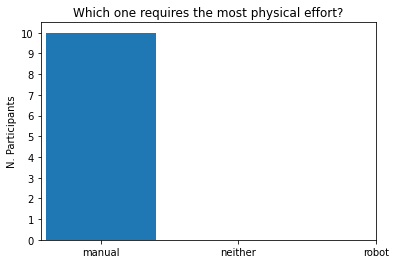

In [20]:
categories = ["manual", "neither", "robot"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["more_effort"] = (df["manual_needle1"] - df["needle1"]).apply(which_requires_more_effort)

by_effort = df.groupby("more_effort")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["more_effort"], by_effort["count"])
plt.yticks(range(11))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which one requires the most physical effort?")
plt.show()

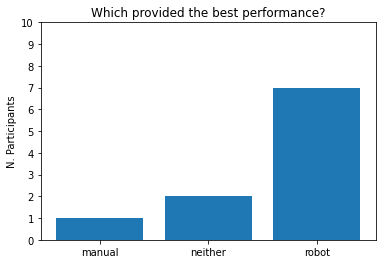

In [21]:
categories = ["manual", "neither", "robot"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["effectivity"] = (df["manual_needle2"] - df["needle2"]).apply(which_requires_more_effort)
df["effectivity"] = pd.Categorical(df["effectivity"], categories)

by_effort = df.groupby("effectivity")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["effectivity"], by_effort["count"])
plt.yticks(range(11))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which provided the best performance?")
plt.show()

[]

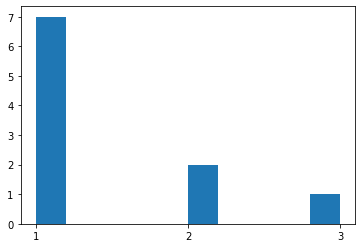

In [22]:
plt.hist(df["changing _instrument"])
plt.yticks(range(9))
plt.xticks(range(1,4))
plt.plot()

In [23]:
manual_needle[1:7]

NameError: name 'manual_needle' is not defined

In [25]:
time_task1 = pd.read_excel("Results.xlsx", sheet_name = "Time_experiment1.1")
time_task1 = time_task1.set_index("Unnamed: 0").T
time_task1 = pd.melt(time_task1, value_vars=time_task1.columns, var_name="category")
time_task1.head()


,category,value
0,manual,12
1,manual,11
2,manual,12
3,manual,15
4,manual,11


In [26]:
manual_value = []
robot_value = []

for index, row in time_task1.iterrows():
    if row["category"] == "manual":
        manual_value.append(row["value"])
    else:
        robot_value.append(row["value"])

In [27]:
print(manual_value, robot_value)

[12, 11, 12, 15, 11, 13, 12, 14, 17, 11, 15, 12, 12, 13, 16, 14, 13, 13, 12, 11, 13, 11, 13, 10, 12, 10, 11, 13, 16, 12, 13, 11, 11, 12, 10, 10, 12, 11, 12, 14, 12, 11, 12, 11, 10, 11, 14, 13, 13, 11] [12, 10, 11, 12, 11, 10, 13, 13, 14, 11, 10, 12, 10, 11, 14, 10, 13, 10, 13, 10, 11, 10, 11, 11, 12, 11, 12, 12, 12, 11, 11, 11, 10, 10, 11, 10, 10, 11, 13, 11, 10, 12, 10, 11, 10, 10, 11, 10, 12, 11]


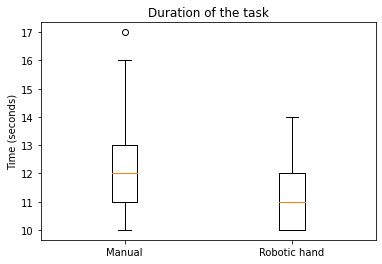

In [29]:
plt.boxplot([manual_value, robot_value], labels=['Manual', 'Robotic hand'])

plt.title('Duration of the task')
plt.ylabel('Time (seconds)')
plt.show()

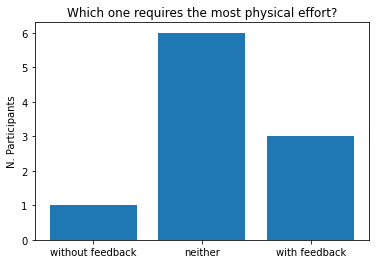

In [30]:
categories = ["without feedback", "neither", "with feedback"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["more_effort"] = (df["forceps2"] - df["forceps_feedback2"]).apply(which_requires_more_effort)
df["more_effort"] = pd.Categorical(df["more_effort"], categories)

by_effort = df.groupby("more_effort")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["more_effort"], by_effort["count"])
plt.yticks(range(7))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which one requires the most physical effort?")
plt.show()

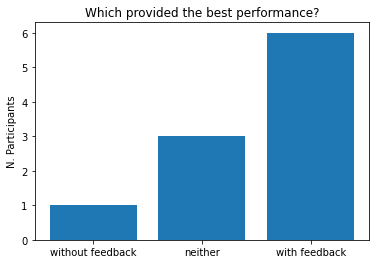

In [31]:
categories = ["without feedback", "neither", "with feedback"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["effectivity"] = (df["forceps3"] - df["forceps_feedback3"]).apply(which_requires_more_effort)
df["effectivity"] = pd.Categorical(df["effectivity"], categories)

by_effort = df.groupby("effectivity")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["effectivity"], by_effort["count"])
plt.yticks(range(7))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which provided the best performance?")
plt.show()